# Credit Card Fraud Detection using Logistic Regression
- Vaishnawi Abhay Chandavale

In [2]:
#Importing libraries
import category_encoders as ce
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Loading dataset
train_data_path = r"C:\Users\Vaishnawi\Downloads\fraudTrain.csv"
test_data_path = r"C:\Users\Vaishnawi\Downloads\fraudTest.csv"

In [4]:
train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

In [5]:
#Display the dimensions of train dataset
print("Training data shape:", train_df.shape)
print("Testing data shape:", test_df.shape)

Training data shape: (1296675, 23)
Testing data shape: (555719, 23)


In [6]:
#Display first 5 rows of train dataset
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [7]:
#Display first 5 rows of test dataset
test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [8]:
# Check for null values in the dataset
train_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [9]:
test_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [10]:
# checking % of data provided by Kaggle in the train & test
1296675 * 100 / (1296675 + 555719)

69.99995681264353

In [11]:
# Separate features and target variable
X_train = train_df.drop(['is_fraud'], axis=1)
y_train = train_df['is_fraud']

In [12]:
X_test = test_df.drop(['is_fraud'], axis=1)
y_test = test_df['is_fraud']

In [13]:
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']


In [14]:
encoder = ce.OrdinalEncoder(cols=categorical_cols)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [15]:
print(X_train.dtypes)

Unnamed: 0                 int64
trans_date_trans_time      int32
cc_num                     int64
merchant                   int32
category                   int32
amt                      float64
first                      int32
last                       int32
gender                     int32
street                     int32
city                       int32
state                      int32
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                        int32
dob                        int32
trans_num                  int32
unix_time                  int64
merch_lat                float64
merch_long               float64
dtype: object


In [16]:
print(X_test.dtypes)

Unnamed: 0                 int64
trans_date_trans_time    float64
cc_num                     int64
merchant                   int32
category                   int32
amt                      float64
first                    float64
last                     float64
gender                     int32
street                   float64
city                     float64
state                      int32
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                      float64
dob                      float64
trans_num                float64
unix_time                  int64
merch_lat                float64
merch_long               float64
dtype: object


In [17]:
X_train.shape

(1296675, 22)

In [18]:
X_test.shape

(555719, 22)

In [19]:
X_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,0,1,2703186189652095,1,1,4.97,1,1,1,1,...,28654,36.0788,-81.1781,3495,1,1,1,1325376018,36.011293,-82.048315
1,1,2,630423337322,2,2,107.23,2,2,1,2,...,99160,48.8878,-118.2105,149,2,2,2,1325376044,49.159047,-118.186462
2,2,3,38859492057661,3,3,220.11,3,3,2,3,...,83252,42.1808,-112.2620,4154,3,3,3,1325376051,43.150704,-112.154481
3,3,4,3534093764340240,4,4,45.00,4,4,2,4,...,59632,46.2306,-112.1138,1939,4,4,4,1325376076,47.034331,-112.561071
4,4,5,375534208663984,5,5,41.96,5,5,2,5,...,24433,38.4207,-79.4629,99,5,5,5,1325376186,38.674999,-78.632459


In [20]:
# Initialize and train the Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [21]:
# Predict the target variable for the test dataset
y_pred = logreg.predict(X_test)

In [22]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy score: {0:0.4f}'.format(accuracy))

Model accuracy score: 0.9961


In [23]:
y_pred_train = logreg.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print('Training accuracy score: {0:0.4f}'.format(train_accuracy))

Training accuracy score: 0.9942


In [24]:
# Predict the target variable for the training dataset to check for overfitting
print('Training set accuracy: {:,.4f}'.format(logreg.score(X_train, y_train)))
print('Testing set accuracy: {:,.4f}'.format(logreg.score(X_test, y_test)))

Training set accuracy: 0.9942
Testing set accuracy: 0.9961


In [25]:
# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n\n', cm)

Confusion Matrix

 [[553574      0]
 [  2145      0]]


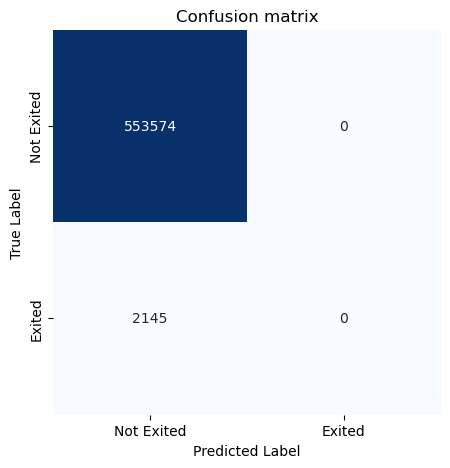

In [26]:
# Plot the confusion matrix
class_names = ['Not Exited', 'Exited']
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()